In [1]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import os
import cv2

data = []
label = ""
labels = []
path = "../Data/fire-smoke/"

for folder in os.listdir(path):
    if folder == "8-scenes":
        label = 0
    else:
        label = 1
    folder_path = path + folder + "/"
    for image_path in os.listdir(folder_path):
        if "jpg" in (folder_path + image_path):
            image = cv2.imread(folder_path + image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (128, 128))
            data.append(image)
            labels.append(label)
            
print(len(data))

4093


In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3)
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(3):
    for j in range(3):
        random_idx = np.random.randint(0, len(data))
        img = data[random_idx]
        axs[i, j].imshow(img)
        axs[i, j].set_title(labels[random_idx])

for ax in axs.flat:
    ax.label_outer()

In [4]:
data = np.array(data)
labels = np.array(labels)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [6]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255.0
x_test /= 255.0

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, Activation, Flatten, Dense

model = Sequential()
inputShape = (128, 128, 3)
chan_dim = -1

model.add(SeparableConv2D(16, (7, 7), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chan_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chan_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SeparableConv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chan_dim))

model.add(SeparableConv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chan_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [8]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr=1e-2, momentum=0.9, decay=1e-2 / 50)
model.compile(loss="binary_crossentropy", optimizer=SGD(), metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 128, 128, 16)      211       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 64, 64, 32)        688       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        1

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("../Data/fire-smoke/best.h5", monitor="val_loss", mode="min", save_best_only=True, verbose=1)

h = model.fit(x_train, y_train, batch_size=64, validation_data=(x_test, y_test), steps_per_epoch=x_train.shape[0] // 64, 
              epochs=50, callbacks=[checkpoint], verbose=1)

model.save("../Data/fire-smoke/last.h5")

Train on 3274 samples, validate on 819 samples
Epoch 1/50
3264/3274 [============================>.] - ETA: 0s - loss: 0.6797 - accuracy: 0.6945
Epoch 00001: val_loss improved from inf to 0.69400, saving model to ../Data/fire-smoke/best.h5
3210/3274 [============================>.] - ETA: 0s - loss: 0.5033 - accuracy: 0.7863
Epoch 00002: val_loss did not improve from 0.69400
3210/3274 [============================>.] - ETA: 0s - loss: 0.4664 - accuracy: 0.8044
Epoch 00003: val_loss did not improve from 0.69400
3210/3274 [============================>.] - ETA: 0s - loss: 0.4044 - accuracy: 0.8380
Epoch 00004: val_loss did not improve from 0.69400
3210/3274 [============================>.] - ETA: 0s - loss: 0.3588 - accuracy: 0.8486
Epoch 00005: val_loss did not improve from 0.69400
3210/3274 [============================>.] - ETA: 0s - loss: 0.3534 - accuracy: 0.8604
Epoch 00006: val_loss did not improve from 0.69400
3210/3274 [============================>.] - ETA: 0s - loss: 0.3382 - 

3210/3274 [============================>.] - ETA: 0s - loss: 0.0903 - accuracy: 0.9685
Epoch 00029: val_loss did not improve from 0.25245
3210/3274 [============================>.] - ETA: 0s - loss: 0.0854 - accuracy: 0.9707
Epoch 00030: val_loss did not improve from 0.25245
3210/3274 [============================>.] - ETA: 0s - loss: 0.0630 - accuracy: 0.9798
Epoch 00031: val_loss did not improve from 0.25245
3210/3274 [============================>.] - ETA: 0s - loss: 0.0734 - accuracy: 0.9766
Epoch 00032: val_loss did not improve from 0.25245
3210/3274 [============================>.] - ETA: 0s - loss: 0.0584 - accuracy: 0.9829
Epoch 00033: val_loss did not improve from 0.25245
3210/3274 [============================>.] - ETA: 0s - loss: 0.0885 - accuracy: 0.9670
Epoch 00034: val_loss did not improve from 0.25245
3210/3274 [============================>.] - ETA: 0s - loss: 0.0715 - accuracy: 0.9738
Epoch 00035: val_loss did not improve from 0.25245
3210/3274 [=======================

In [10]:
from sklearn.metrics import classification_report

label_names = ['Non-fire', 'Fire']
res = model.predict_classes(x_test, batch_size=64)
print(classification_report(y_test, res, target_names=label_names))

              precision    recall  f1-score   support

    Non-fire       0.90      0.85      0.88       515
        Fire       0.77      0.84      0.81       304

    accuracy                           0.85       819
   macro avg       0.84      0.85      0.84       819
weighted avg       0.85      0.85      0.85       819



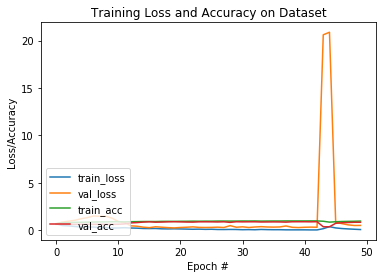

In [11]:
n = np.arange(0, 50)
plt.figure()
plt.plot(n, h.history["loss"], label="train_loss")
plt.plot(n, h.history["val_loss"], label="val_loss")
plt.plot(n, h.history["accuracy"], label="train_acc")
plt.plot(n, h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

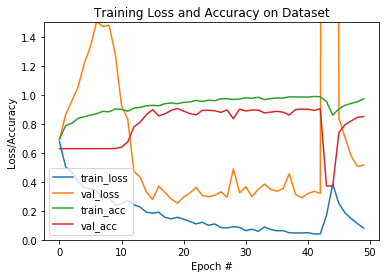

In [14]:
n = np.arange(0, 50)
plt.figure()
plt.plot(n, h.history["loss"], label="train_loss")
plt.plot(n, h.history["val_loss"], label="val_loss")
plt.plot(n, h.history["accuracy"], label="train_acc")
plt.plot(n, h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.ylim((0, 1.5))
plt.show()

In [17]:
from tensorflow.keras.models import load_model

model = load_model("../Data/fire-smoke/best.h5")

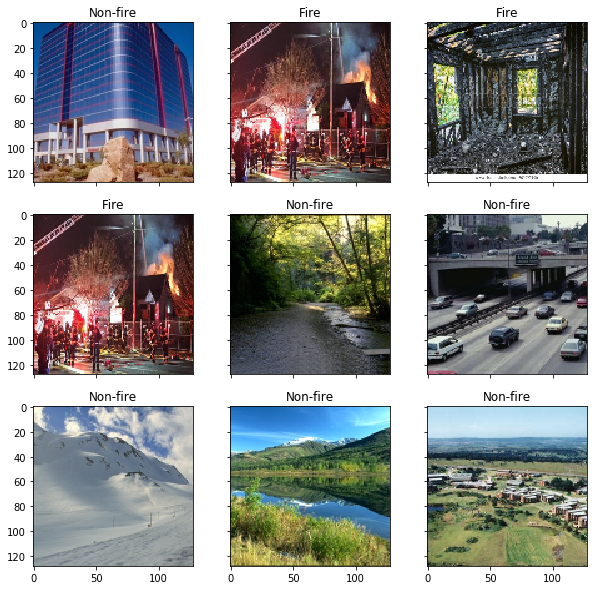

In [18]:
fig, axs = plt.subplots(3, 3)
fig.set_figheight(10)
fig.set_figwidth(10)

for i in range(3):
    for j in range(3):
        rand_idx = np.random.randint(0, len(x_test))
        img = x_test[rand_idx]
        axs[i, j].imshow(img)
        img = img.reshape(1, 128, 128, 3)
        res = model.predict_classes(img)[0]
        axs[i, j].set_title(label_names[res[0]])

for ax in axs.flat:
    ax.label_outer()